# 데이터 관련 직군의 연봉 예측 프로젝트

## 목차

### Part 1. Instroduction & Column Description
- 프로젝트의 개요
- 특성(컬럼) 설명 및 요약
- 가설(문제) 설정

### Part 2. EDA & Feature Engineering
- 타겟 로그 변환
- 데이터셋 & 프로파일 확인
- 각 컬럼별 특징 확인
- 결측치 확인 및 처리
- 중복데이터 처리
- 원핫인코딩

### Part 3. Modeling
- 기준모델
- 훈련 데이터와 검증, 테스트 데이터 구분
- 예측 알고리즘 선택 및 모델 설계
- 사이킷런 파이프 라인 구축
- 모델 학습 및 성능 평가
- 하이퍼파라미터 튜닝 및 최종 모델 선택

### Part 4. 가설 확인 및 예측
- 가설 검정
- 예측

# <center> Part1. Instroduction & Column Description</center>

## Instroduction

스택오버플로우는 2011년부터 매년 유저들을 대상으로 설문조사를 진행한다.
  
2017년부터 2020년까지 스택오버플로에서 개발자들을 대상으로 진행한 설문조사를 토대로 데이터 관련 직군의 연봉을 예측한다.

## Column description

- Year : 설문조사를 시행한 연도
- Hobbyist : 취미로 프로그래밍을 하거나 오픈 소스 프로젝트에 기여하는가
    - 1. Yes, I program as a hobby(네, 취미로 프로그래밍을 하고 있습니다.)
    - 2. Yes, I contribute to open source projects(네, 오픈 소스 프로젝트에 기여합니다.)
    - 3. Yes, both(네, 둘 다 하고 있습니다.)
    - 4. No(이미 응답하지 않은 경우 종료)
- ConvertedComp : 달러로 변환된 연봉
- Country : 거주한 나라(총 180개의 나라)
- EdLevel : 학위 정보
    - Bachelor's degree(학사)
    - Master's degree(석사)
    - Some college / university study without earning a bachelor's degree(학위를 취득하지 않는 대학)
    - Doctoral degree(박사)
    - Secondary school(중학교)
    - Associate degree(준학사)
    - Professional degree(전문 학위)
    - Primary / elementary school(초등학교)
    - I never completed any formal education(정규 교육을 받지 않음)
    - I prefer not to anwer(대답을 하지 않음)
- Employment : 고용 형태
    - Employed full-time(정규직)
    - Independent contractor, freelancer, or self-employed(독립 계약, 프리랜서, 자영업자)
    - Employed part-time(아르바이트)
- JobSat : 직업 만족도
    - 0 ~ 10점 만족도
- OrgSize : 회사 규모
    - 2 to 9 employees
    - 10 to 19 employees
    - 20 to 99 employees
    - 100 to 499 employees
    - 500 to 900 employees
    - 1,000 to 4,999 employees
    - 5,000 to 9,999 employees
    - 10,000 or more employees
    - Just me - I am a freelancer, sole proprietor, etc
    - I don't know
    - I prefer not to answer
- UndergradMajor : 학부 전공
    - Computer science(컴퓨터 과학)
    - Another engineering discipline(다른 공학 분야)
    - Information systems(정보 시스템)
    - Natural science(자연 과학)
    - Mathematics or statistics(수학 or 통계)
    - Business(비지니스)
    - Social science(사회과학)
    - Web development or web design(웹 개발 or 웹 디자인)
    - Humanities(인문학)
    - Fine arts or performing arts(미술 or 공연 예술)
    - I never declared a major(전공이 없음)
    - Computer engineering or electrical / electronics engineering(컴퓨터 공학 or 전기/전자 공학)
    - Computer programming or Web development(컴퓨터 프로그래밍 or 웹 개발)
    - Health sciencec(헬스 과학)
    - Something else(이외 분야 전공)
- YearsCodePro : 일한 경력
    - 1 ~ 28년 사이의 경력
- Data scientist or machine learning specialist : 데이터 과학자 or 머신러닝 전문가 
- Database administrator : 데이터베이스 관리자
- Data or business analyst : 데이터 비지니스 or 분석가
- Engineer, data : 데이터 엔지니어

## 가설 제시

- GDP가 높은 나라의 개발자라면 연봉이 많을 것이다.
- 연차가 오래될수록 연봉이 많을 것이다.
- 취득한 학위에 따라서 연봉이 차이가 날 것이다.
    - 학사 -> 석사 -> 박사 순
- 연도가 지날수록 연봉이 높아질 것이다.
- 회사의 규모가 클수록 평균 연봉이 많을 것이다.

# <center> Part 2. EDA & Feature Engineering</center>

In [1]:
!pip install xgboost
!pip install category_encoders
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. 데이터셋 준비

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data_survey.csv')
df.head()

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,1,0,NaN,NaN
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN,NaN
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN,NaN


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. EDA & Feature Engineering

In [4]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True).to_notebook_iframe()

### 데이터 프로파일링 해석

- Country 컬럼이 180개의 높은 카디널리티를 보유하고 있다.
- 대부분 10%이하의 결측치를 가지고 있지만 데이터 엔지니어 직업군에서 높은 결측치를 보인다.
    - 이는 데이터 엔지니어라는 직무가 확실하게 정립이 되지 않은 연도의 설문조사 질문에 없었던 것으로 파악된다.

## 2-1. Target의 분포 확인

In [5]:
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

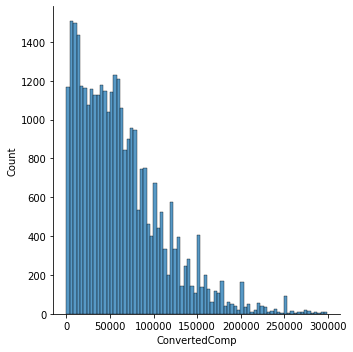

In [6]:
sns.displot(df['ConvertedComp']);

((array([-4.10032458, -3.89024093, -3.77553261, ...,  3.77553261,
          3.89024093,  4.10032458]),
  array([1.76185582e-01, 1.00000000e+00, 1.00000000e+00, ...,
         2.97828000e+05, 2.98356000e+05, 2.99436000e+05])),
 (46720.04367191667, 62593.09253052932, 0.9528953760849345))

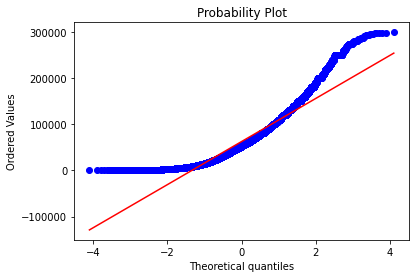

In [7]:
from scipy import stats
fig = plt.figure()
stats.probplot(df['ConvertedComp'], plot=plt)

In [8]:
df['ConvertedComp'].mean()

62593.092530529335

### Target의 분포
- 중심이 왼쪽으로 치우친 형태로 정규분포에서 벗어나 있다.
- 이상치를 제거해주고 로그 변환을 적용해 정규 분포 형태로 만들어준다.

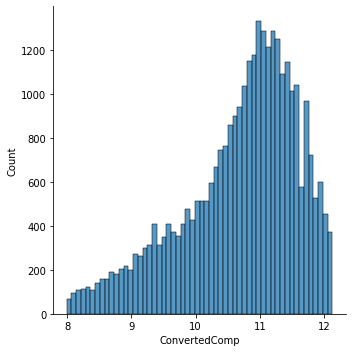

In [9]:
df = df[(df['ConvertedComp'] >= np.percentile(df['ConvertedComp'], 2.5)) & 
        (df['ConvertedComp'] <= np.percentile(df['ConvertedComp'], 97.5))] 
sns.displot(np.log1p(df['ConvertedComp']));

### 로그 변환
- 이상치 제거와 로그 변환을 통해 완벽한 정규분포를 이루진 못했지만 왜도가 완화된 것을 확인할 수 있다.
- 로그 변환한 값을 데이터프레임에 적용시켜주고 EDA와 feature engineering을 진행하도록 하겠다.

In [10]:
df['ConvertedComp'] = np.log1p(df['ConvertedComp'])

## 2-1. 결측치

In [11]:
df.isnull().sum()

Year                                                 0
Hobbyist                                             0
ConvertedComp                                        0
Country                                              0
EdLevel                                            429
Employment                                          37
JobSat                                              71
OrgSize                                           1548
UndergradMajor                                    2898
YearsCodePro                                        73
Data scientist or machine learning specialist        0
Database administrator                               0
Data or business analyst                          2405
Engineer, data                                   12791
dtype: int64

### 해설

- 먼저 결측치를 보간할 수 있는 컬럼부터 결측치를 대체해준다.
- 보간할 수 있는 컬럼을 다 처리했다면 대체할 수 없는 컬럼을 제거하거나 보간해준다.

### 2-1.1 EdLevel

- EdLevel 컬럼은 학위 정보를 나타낸 컬럼으로 설문조사에 문항 중 'I prefer not to answer'이라는 문항이기 때문에 답변을 하지 않은 것으로 간주하고 대체해준다.

In [12]:
df.EdLevel = df.EdLevel.fillna('I prefer not to answer')

### 2-1.2 UndergradMajor

- UndergradMajor 컬럼은 학부 때 전공을 나타낸 컬럼으로 설문조사 상에서 이외 분야를 전공했다는 선택지가 있지만 가장 많은 결측치를 보유하고 있다.
- 평균, 최대값, 최소값 등으로 대체할 수 있지만 데이터의 신뢰성을 위해 결측치를 제거해준다.

In [13]:
df.dropna(subset=['UndergradMajor'], inplace=True)

### 2-1.3 Data or business analyst & Engineer, data

- 데이터 엔지니어 컬럼은 프로파일링에서도 보았듯이 이전 설문조사에서 반영이 되지 않은 것이기 때문에 0과 1로 구성된 설문조사에서 0으로 대체해준다.
- 0과 1로 구성된 데이터이기 때문에 int type을 바꿔준다.

In [14]:
df['Data or business analyst'] = df['Data or business analyst'].fillna(0).astype('int')
df['Engineer, data'] = df['Engineer, data'].fillna(0).astype('int')

### 2-1.4 Other columns

- UndergradMajor 컬럼의 결측치를 제거했음에도 Employment, JobSat, OrgSize, YearsCodePro 등 여러 컬럼에서 결측치를 확인할 수 있다.
- 이는 마찬가지로 제거해준다.

In [15]:
df.dropna(subset=['OrgSize', 'Employment', 'JobSat', 'YearsCodePro'], inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].astype('int')

In [16]:
df.isnull().sum()

Year                                             0
Hobbyist                                         0
ConvertedComp                                    0
Country                                          0
EdLevel                                          0
Employment                                       0
JobSat                                           0
OrgSize                                          0
UndergradMajor                                   0
YearsCodePro                                     0
Data scientist or machine learning specialist    0
Database administrator                           0
Data or business analyst                         0
Engineer, data                                   0
dtype: int64

In [17]:
df.shape

(27633, 14)

## 2-2. 중복 데이터

In [18]:
df.duplicated().sum()

42

In [19]:
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

## 2-3. 각 컬럼별 EDA 및 Feature Engineering

### 2-3.1 Hobbyist

- Hobbyist 컬럼은 5개의 답변이 존재하지만 결국 취미라는 질문에 'Yes' or 'No'라는 답변과도 같기 때문에 1과 0로 대체해준다.

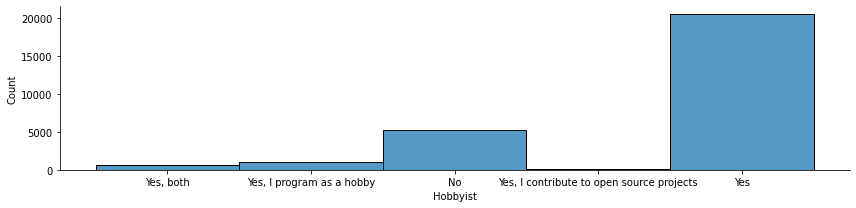

In [21]:
sns.displot(df['Hobbyist'], height = 3, aspect = 4);

In [22]:
df.Hobbyist = df.Hobbyist.replace({'Yes' : 1,
                                   'Yes, both' : 1,
                                   'Yes, I program as a hobby' : 1,
                                   'Yes, I contribute to open source projects' : 1,
                                   'No' : 0})

In [23]:
df.Hobbyist.value_counts()

1    22388
0     5203
Name: Hobbyist, dtype: int64

### 2-3.2 Country

- Country 컬럼은 Class가 180개로 높은 카디널리티를 보유하고 있다.
    - High cardinality는 모델 성능 저하의 원인이 될 수 있음으로 적절히 처리해준다.
- 프로파일링으로 확인해본 결과 표본이 적은 나라가 있는 것을 알 수 있었고 이는 이상치로 판단하고 제거해준다.

In [24]:
labels = df['Country'].value_counts()
country_list = labels[labels >= 50].index.tolist()
len(country_list)

60

In [25]:
df = df[df['Country'].isin(country_list)].reset_index(drop=True)
df['Country'].value_counts()

United States                   7611
United Kingdom                  1997
Germany                         1846
India                           1720
Canada                          1150
France                           799
Brazil                           759
Australia                        732
Spain                            606
Netherlands                      603
Russian Federation               547
Poland                           480
Italy                            434
Sweden                           428
Switzerland                      380
Mexico                           311
Belgium                          276
South Africa                     266
Denmark                          266
Turkey                           261
Austria                          245
Pakistan                         231
Israel                           221
Norway                           217
Czech Republic                   215
Ukraine                          205
Greece                           197
R

### 2-3.3 EdLevel

- EdLevel 컬럼에서 표본 개수가 적은 'Professional degree', 'Secondary chool', 'I prefer not to answer', 'Associate degree'를 묶어 'Other degree'로 만들어줍니다.

In [26]:
df['EdLevel'] = df['EdLevel'].replace({'Professional degree' : 'Other degree'
                                      ,'I prefer not to answer' : 'Other degree'
                                      ,'Secondary school' : 'Other degree'
                                      ,'Associate degree' : 'Other degree'})

In [27]:
df.EdLevel.value_counts()

Bachelor's degree                                                    11822
Master's degree                                                       7690
Some college/university study without earning a bachelor's degree     3746
Doctoral degree                                                       1592
Other degree                                                          1506
Name: EdLevel, dtype: int64

### 2-3.4 OrgSize

- OrgSize 컬럼은 회사의 규모별로 1('VerySmall'), 2('Small'), 3('Medium'), 4('Large'), 6('VeryLarge')로 대체해줍니다.
- 질문에 답변을 하지 않거나 회사 규모를 모르는 답변은 표본 수가 적기 때문에 제거해줍니다.

In [28]:
df['OrgSize'] = df.OrgSize.replace({'2 to 9 employees' : 1
                                    ,'10 to 19 employees': 1
                                    ,'Just me - I am a freelancer, sole proprietor, etc.': 1
                                    ,'20 to 99 employees': 2
                                    ,'100 to 499 employees': 3
                                    ,'500 to 999 employees': 3
                                    ,'1,000 to 4,999 employees': 4
                                    ,'5,000 to 9,999 employees': 4
                                    ,'10,000 or more employees': 5})

In [29]:
df.drop(df[df['OrgSize'] == "I don't know"].index, inplace=True)
df.drop(df[df['OrgSize'] == "I prefer not to answer"].index, inplace=True)
df['OrgSize'] = df['OrgSize'].astype('int')

In [30]:
df.OrgSize.value_counts()

1    6696
3    6205
2    5606
4    4094
5    3727
Name: OrgSize, dtype: int64

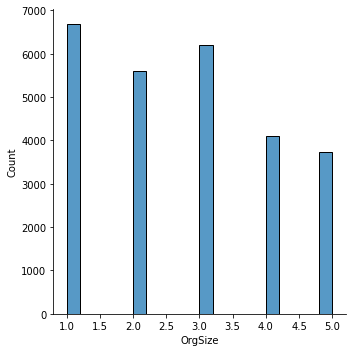

In [56]:
sns.displot(df['OrgSize'])

### 2-3.5 UndergradMajor

- UndergradMajor 컬럼은 학부 전공에 관한 답변이다.
- 비슷한 전공을 가진 클래스끼리 묶어주고 표본이 적은 클래스끼리 묶어 'Other'로 만들어준다.

In [31]:
df['UndergradMajor'] = df['UndergradMajor'].replace({'Computer engineering or electrical/electronics engineering': 'Another engineering discipline'
                                                    ,'Computer programming or Web development': 'Web dev or Computer programming'
                                                    ,'Web development or web design': 'Web dev or Computer programming'
                                                    ,'I never declared a major': 'Something else'
                                                    ,'Health science': 'Something else'
                                                    ,'Fine arts or performing arts': 'Something else'})

In [32]:
df.UndergradMajor.value_counts()

Computer science                   14582
Another engineering discipline      2574
Information systems                 2023
Natural science                     1852
Mathematics or statistics           1690
Business                             879
Web dev or Computer programming      734
Social science                       729
Something else                       719
Humanities                           546
Name: UndergradMajor, dtype: int64

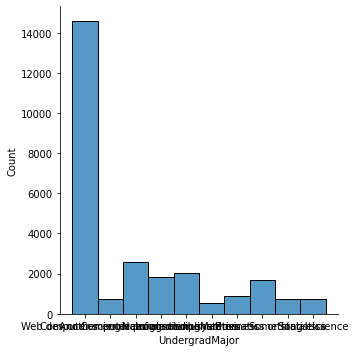

In [57]:
sns.displot(df['UndergradMajor'])

### 2-3.6 GDP
- 연봉은 나라별 1인당 GDP에 따라 차이가 날 것으로 생각된다.
- 그렇기 때문에 1인당 GDP 컬럼을 만들어 추가해준다.

In [33]:
country = []

for row in df['Country']:
    if row == 'United States':
        country.append(63213)
    elif row == 'United Kingdom':
        country.append(41930)
    elif row == 'India':
        country.append(1960)
    elif row == 'Germany':
        country.append(46985)
    elif row == 'Canada':
        country.append(44515)
    elif row == 'France':
        country.append(40393)
    elif row == 'Brazil':
        country.append(8710)
    elif row == 'Australia':
        country.append(53285)
    elif row == 'Spain':
        country.append(28538)
    elif row == 'Netherlands':
        country.append(50695)
    elif row == 'Russian Federation':
        country.append(10370)
    elif row == 'Poland':
        country.append(14375)
    elif row == 'Italy':
        country.append(33138)
    elif row == 'Sweden':
        country.append(54858)
    elif row == 'Switzerland':
        country.append(83010)
    elif row == 'Mexico':
        country.append(9025)
    elif row == 'Turkey':
        country.append(10053)
    elif row == 'Belgium':
        country.append(45613)
    elif row == 'South Africa':
        country.append(6233)
    elif row == 'Denmark':
        country.append(61105)
    elif row == 'Pakistan':
        country.append(1560)
    elif row == 'Austria':
        country.append(48355)
    elif row == 'Israel':
        country.append(41360)
    elif row == 'Norway':
        country.append(78880)
    elif row == 'Czech Republic':
        country.append(20778)
    elif row == 'Ukraine':
        country.append(2998)
    elif row == 'Greece':
        country.append(18665)
    elif row == 'Iran':
        country.append(4623)
    elif row == 'Romania':
        country.append(11698)
    elif row == 'Finland':
        country.append(48270)
    elif row == 'New Zealand':
        country.append(41263)
    elif row == 'Portugal':
        country.append(21783)
    elif row == 'Argentina':
        country.append(11478)
    elif row == 'Ireland':
        country.append(60438)
    elif row == 'Indonesia':
        country.append(3823)
    elif row == 'Japan':
        country.append(40880)
    elif row == 'Hungary':
        country.append(15160)
    elif row == 'Bulgaria':
        country.append(8818)
    elif row == 'Bangladesh':
        country.append(2075)
    elif row == 'Colombia':
        country.append(6153)
    elif row == 'Nigeria':
        country.append(2020)
    elif row == 'Philippines':
        country.append(3630)
    elif row == 'Chile':
        country.append(13965)
    elif row == 'Slovenia':
        country.append(24525)
    elif row == 'China':
        country.append(9763)
    elif row == 'Malaysia':
        country.append(10608)
    elif row == 'Serbia':
        country.append(6613)
    elif row == 'Lithuania':
        country.append(17858)
    elif row == 'Croatia':
        country.append(14435)
    elif row == 'Sri Lanka':
        country.append(3910)
    elif row == 'Iran, Islamic Republic of...':
        country.append(4623)
    elif row == 'Singapore':
        country.append(56083)
    elif row == 'Estonia':
        country.append(21513)
    elif row == 'Latvia':
        country.append(16783)
    elif row == 'Thailand':
        country.append(6725)
    elif row == 'Taiwan':
        country.append(26972)
    elif row == 'Belarus':
        country.append(5925)
    elif row == 'Egypt':
        country.append(2878)
    elif row == 'Kenya':
        country.append(1715)
    elif row == 'Slovakia':
        country.append(18283)
    elif row == 'Uruguay':
        country.append(16678)
    elif row == 'Viet Nam':
        country.append(3100)
    elif row == 'Hong Kong (S.A.R.)':
        country.append(48868)
    else:
        country.append(0)

In [34]:
len(country)

26328

In [35]:
df['GDP'] = country

In [36]:
df['GDP'] = np.log1p(df['GDP'])

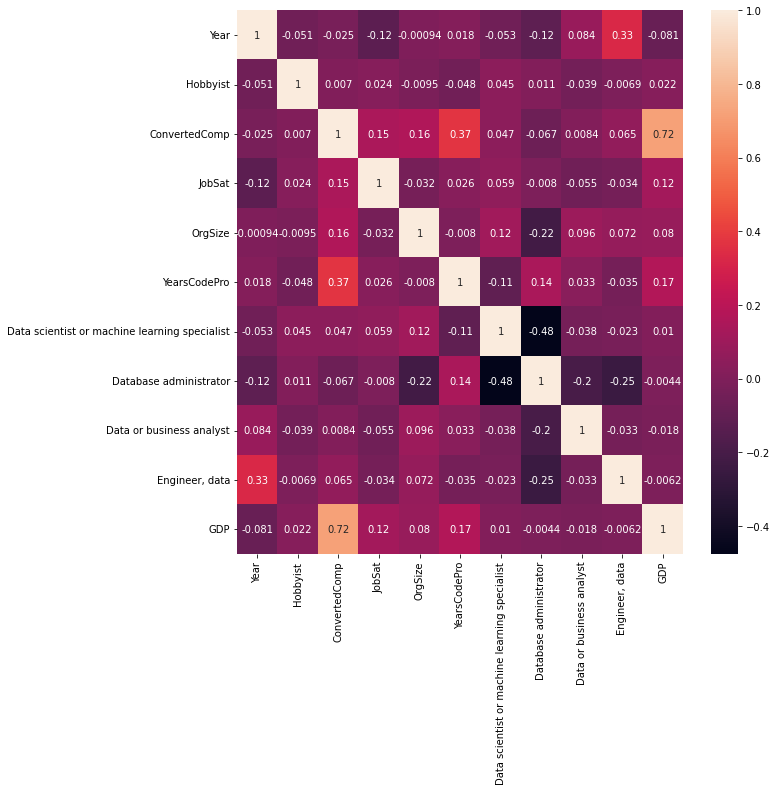

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

## 2-4. 원핫인코딩(OneHotEncoding)

In [38]:
data = pd.get_dummies(df)
data.shape

(26328, 89)

# <center> Part 3. Modeling </center>

## 3-0. 데이터셋 나누기

In [39]:
from sklearn.model_selection import train_test_split

y=data['ConvertedComp']
X=data.drop('ConvertedComp', axis=1, inplace=False)

train, test = train_test_split(data, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=0.2, random_state=2)
train.shape, val.shape, test.shape

((16849, 89), (4213, 89), (5266, 89))

In [40]:
target = 'ConvertedComp'

y_train = train[target]
X_train = train.drop(target, axis=1)
y_val = val[target]
X_val = val.drop(target, axis=1)
y_test = test[target]
X_test = test.drop(target, axis=1)

X_train.shape, X_val.shape, X_test.shape

((16849, 88), (4213, 88), (5266, 88))

## 3-1. Baseline

- 모델을 만들기 전 기준 모델(Baseline)을 만들어 어느정도의 에러가 나는지 확인한다.

In [58]:
# 기준모델로 에러 계산
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predict = y_train.mean()
y_pred = [predict] * len(y_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')

MAE: 0.702
RMSE: 0.884


## 3-2. LinearRegression, Ridge, Lasso

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_val)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_val)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_val)

print(f'LinearRegression MAE: {mean_absolute_error(y_val, lr_pred)}')
print(f'LinearRegression RMSLE: {np.sqrt(mean_squared_error(y_val, lr_pred))}')
print(f'Ridge MAE: {mean_absolute_error(y_val, ridge_pred)}')
print(f'Ridge RMSLE: {np.sqrt(mean_squared_error(y_val, ridge_pred))}')
print(f'Lasso MAE: {mean_absolute_error(y_val, lasso_pred)}')
print(f'Lasso RMSLE: {np.sqrt(mean_squared_error(y_val, lasso_pred))}')

LinearRegression MAE: 0.3538151777960914
LinearRegression RMSLE: 0.4890210475609989
Ridge MAE: 0.35382655067819485
Ridge RMSLE: 0.4889280071007893
Lasso MAE: 0.6558678905758492
Lasso RMSLE: 0.822693164010893


### 해설
- 3개의 모델 중 lasso 회귀의 성능이 상대적으로 떨어지는 것을 확인할 수 있다.

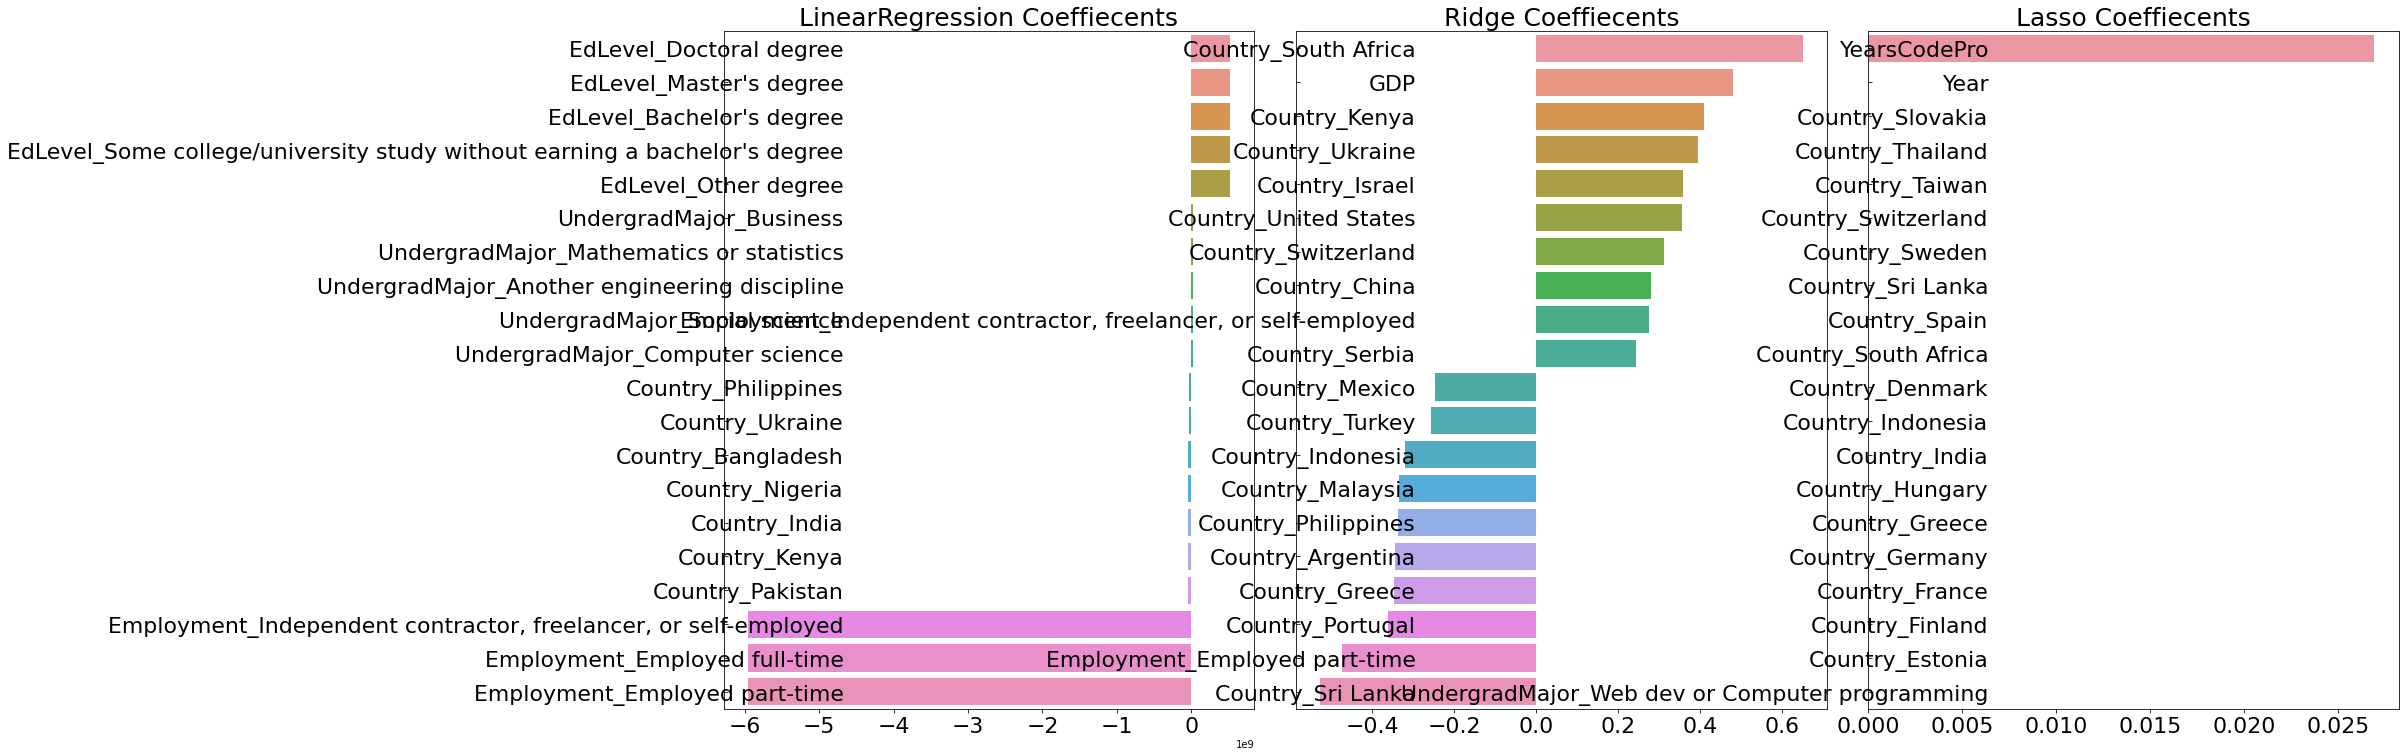

In [43]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_train.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)
     

### 해설
- LinearRegression과 Ridge는 회귀계수 분포가 유사하지만 Lasso는 전혀 다른 분포를 보인다.
- 이를 해결하기 위해 교차 검증과 하이퍼 파라미터를 수정하는 작업을 진행한다.

### 3-2.1 교차 검증 폴드
- Lasso 회귀만 회귀계수의 이상이 측정되었다.
- 학습 데이터의 데이터 분할에서 문제가 있었는지 확인하기 위해 교차 검증 폴드 세트로 분할해 측정해본다.
- cross_val_score()

In [44]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:
        #분할하지 않고 전체 데이터로 cross_val_score() 수행, 모델별 cv rmse값과 평균 rmse 출력
        rmse_list=np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5))
        rmse_avg=np.mean(rmse_list)
        print('\n{0} CV RMSLE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSLE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

#앞예제에서 학습한 모델들의 cv rmse값 출력
models=[lr_reg,ridge_reg,lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSLE 값 리스트: [0.461 0.481 0.509 0.492 0.509]
LinearRegression CV 평균 RMSLE 값: 0.49

Ridge CV RMSLE 값 리스트: [0.461 0.481 0.509 0.492 0.509]
Ridge CV 평균 RMSLE 값: 0.49

Lasso CV RMSLE 값 리스트: [0.787 0.801 0.841 0.849 0.858]
Lasso CV 평균 RMSLE 값: 0.827


### 해설
- 5개의 CV로 평균 RMSLE를 측정해도 여전히 Lasso 회귀의 성능이 떨어진다.
- 이번엔 하이퍼 파라미터 튜닝을 진행해본다.

### 3-2.2 Ridge & Lasso 하이퍼 파라미터 설정

In [45]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
    grid_model=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_train,y_train)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSLE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))

ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)
     

Ridge 5 CV 시 최적 평균 RMSLE 값: 0.4909, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSLE 값: 0.4952, 최적 alpha:{'alpha': 0.001}


### 해설
- 하이퍼 파라미터 튜닝을 통해 Lasso 모델도 예측 성능이 좋아진 것을 확인할 수 있다.
- 이후 최적화 alpha 값으로 데이터를 학습하고 시각화로 확인해본다.

LinearRegression MAE: 0.3538151777960914
LinearRegression RMSLE: 0.4890210475609989
Ridge MAE: 0.3538929558559477
Ridge RMSLE: 0.48863772962387125
Lasso MAE: 0.3585970363617068
Lasso RMSLE: 0.4906305591403668


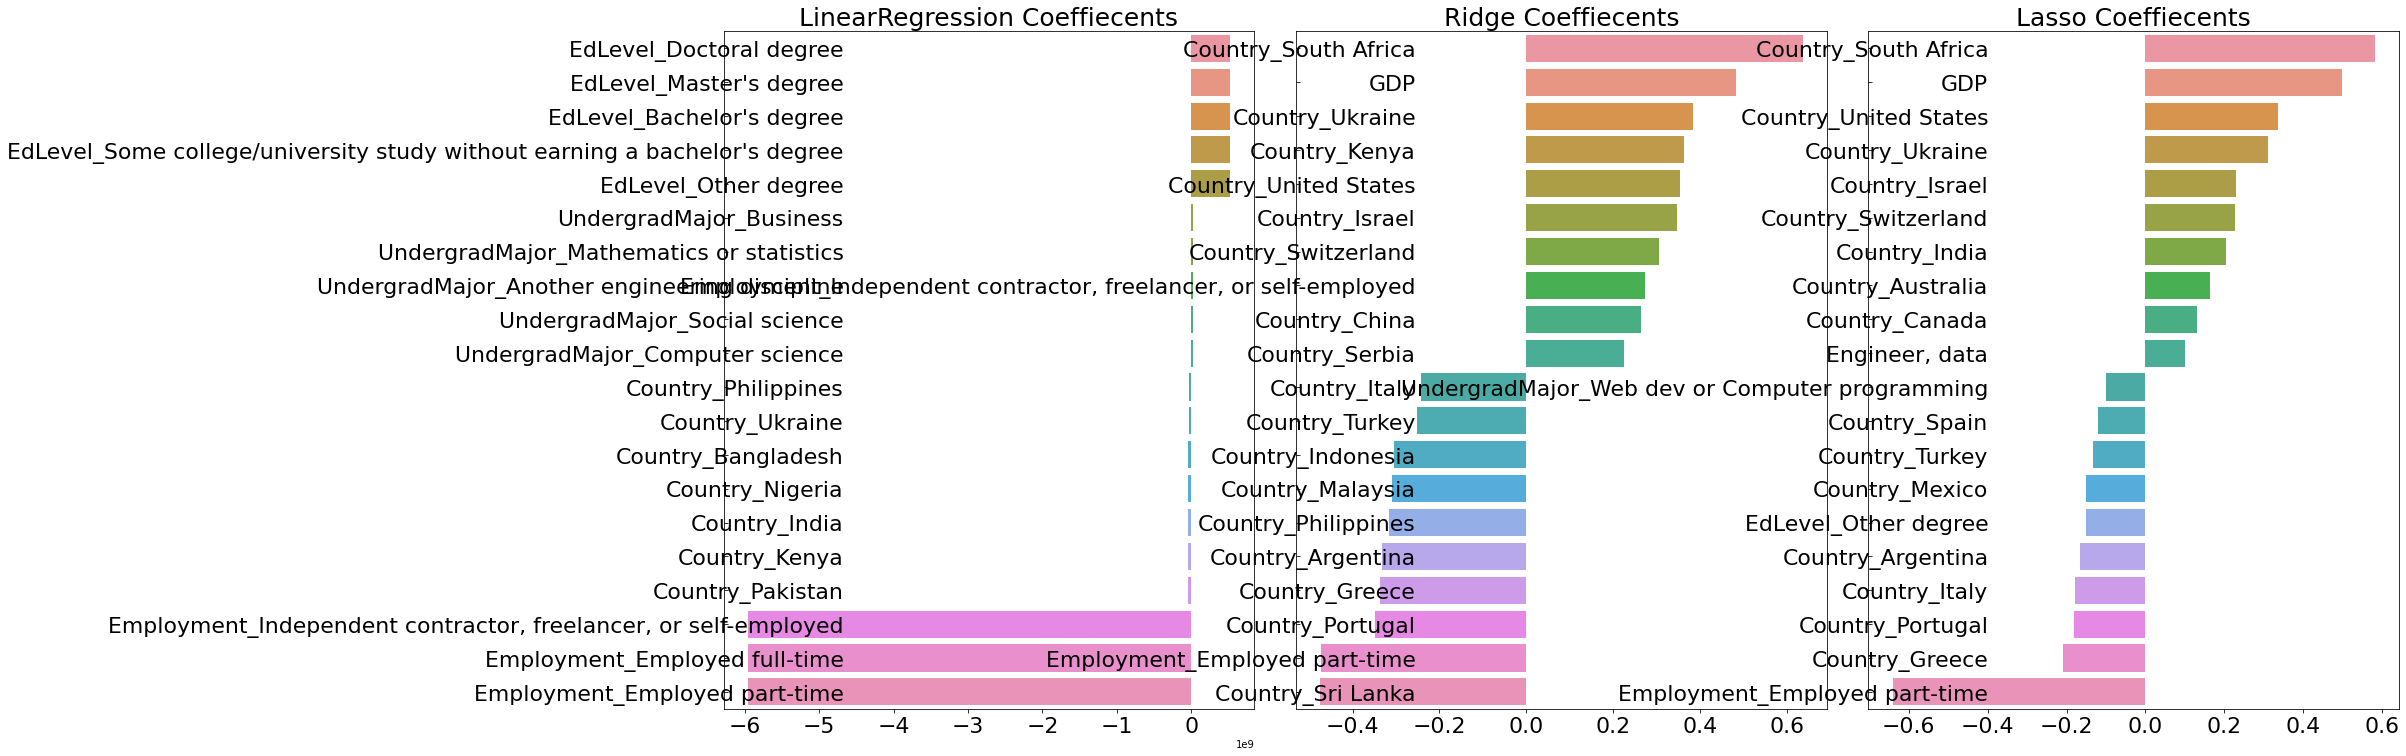

In [46]:
#앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
lr_pred = lr_reg.predict(X_val)

ridge_reg=Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)
ridge_pred = ridge_reg.predict(X_val)

lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
lasso_pred = lasso_reg.predict(X_val)

#모든 모델의 RMSE 출력
print(f'LinearRegression MAE: {mean_absolute_error(y_val, lr_pred)}')
print(f'LinearRegression RMSLE: {np.sqrt(mean_squared_error(y_val, lr_pred))}')
print(f'Ridge MAE: {mean_absolute_error(y_val, ridge_pred)}')
print(f'Ridge RMSLE: {np.sqrt(mean_squared_error(y_val, ridge_pred))}')
print(f'Lasso MAE: {mean_absolute_error(y_val, lasso_pred)}')
print(f'Lasso RMSLE: {np.sqrt(mean_squared_error(y_val, lasso_pred))}')

#모든 모델의 회귀 계수 시각화
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

### 3-2.3 데이터셋의 왜곡 정도

In [47]:
from scipy.stats import skew

#object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index=df.dtypes[df.dtypes!='object'].index

#train에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew()호출
skew_features=df[features_index].apply(lambda x:skew(x))
#skew(왜곡) 정도가 1이상인 칼럼만 추출
skew_features_top=skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

Engineer, data    1.550033
YearsCodePro      1.232367
dtype: float64


In [48]:
df['YearsCodePro'] = np.log1p(df['YearsCodePro'])


In [49]:
data2 = pd.get_dummies(df)
from sklearn.model_selection import train_test_split

y=data2['ConvertedComp']
X=data2.drop('ConvertedComp', axis=1, inplace=False)

train, test = train_test_split(data2, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=0.2, random_state=2)
train.shape, val.shape, test.shape

((16849, 89), (4213, 89), (5266, 89))

In [50]:
target = 'ConvertedComp'

y_train = train[target]
X_train = train.drop(target, axis=1)
y_val = val[target]
X_val = val.drop(target, axis=1)
y_test = test[target]
X_test = test.drop(target, axis=1)

X_train.shape, X_val.shape, X_test.shape

((16849, 88), (4213, 88), (5266, 88))

In [51]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSLE 값: 0.4772, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSLE 값: 0.4817, 최적 alpha:{'alpha': 0.001}


LinearRegression MAE: 0.3411810388295363
LinearRegression RMSLE: 0.47605114102405843
Ridge MAE: 0.3412032788195148
Ridge RMSLE: 0.47566941651170636
Lasso MAE: 0.3456846935092661
Lasso RMSLE: 0.4777776615759902


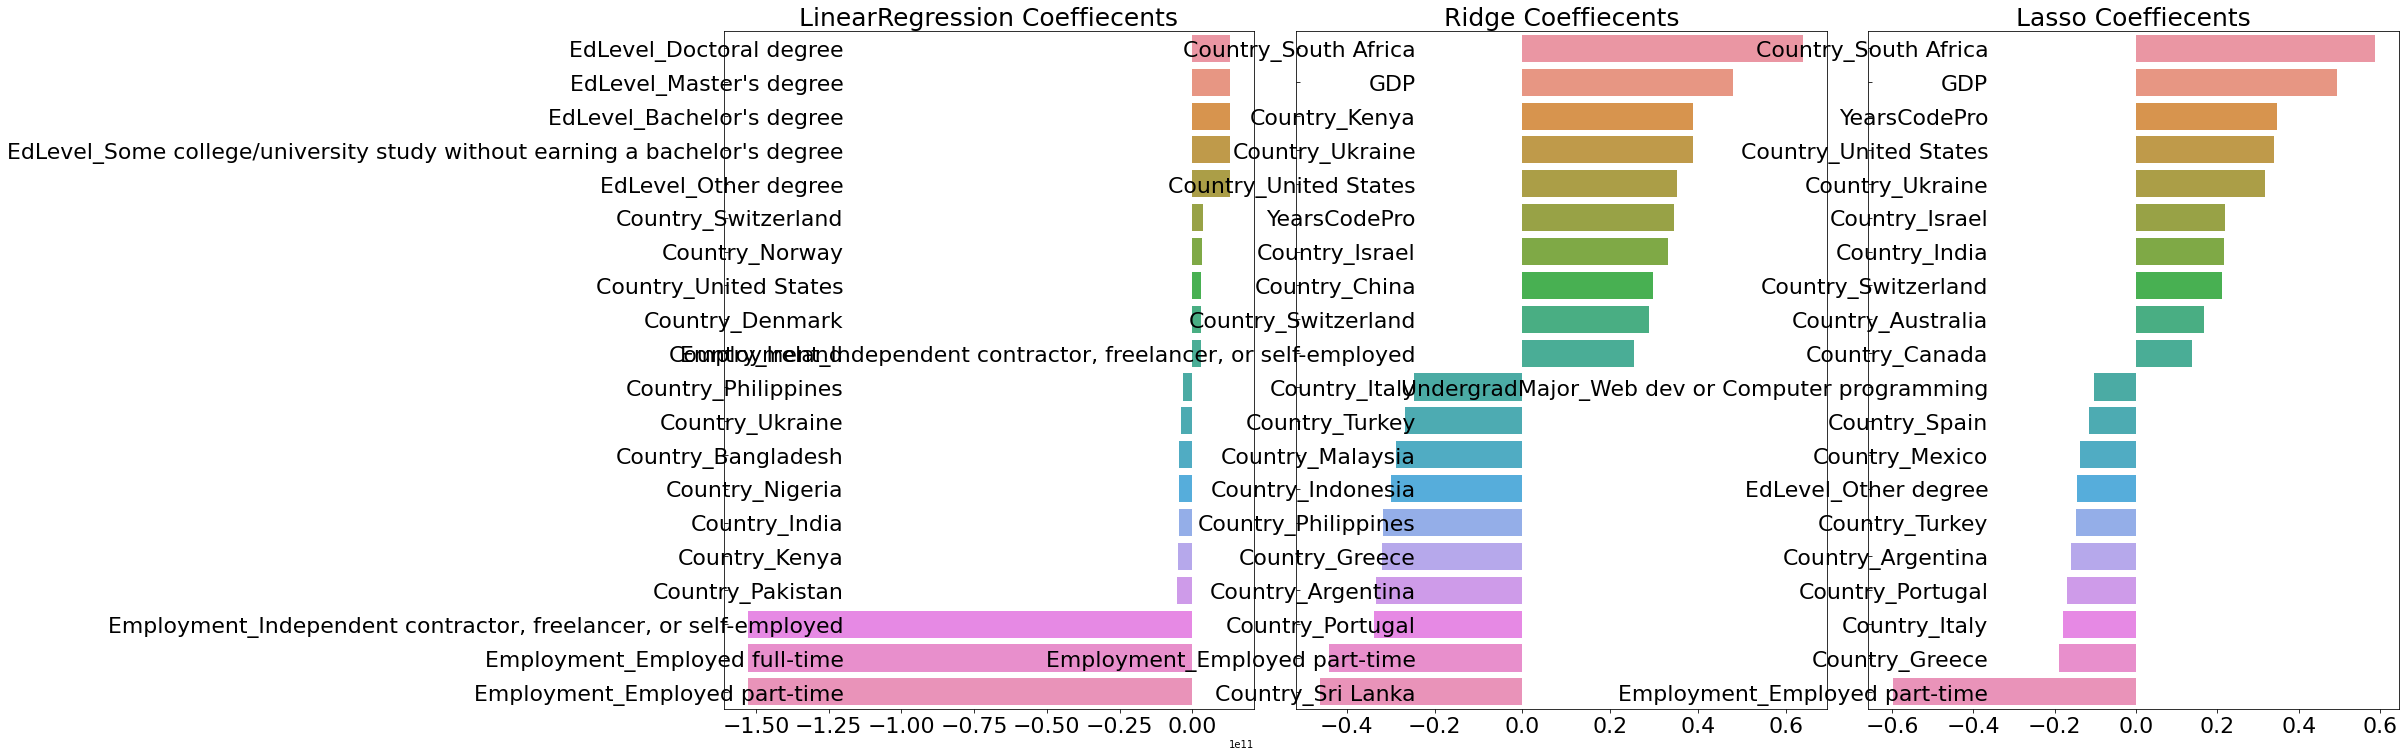

In [52]:
#앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
lr_pred = lr_reg.predict(X_val)

ridge_reg=Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)
ridge_pred = ridge_reg.predict(X_val)

lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
lasso_pred = lasso_reg.predict(X_val)

#모든 모델의 RMSE 출력
print(f'LinearRegression MAE: {mean_absolute_error(y_val, lr_pred)}')
print(f'LinearRegression RMSLE: {np.sqrt(mean_squared_error(y_val, lr_pred))}')
print(f'Ridge MAE: {mean_absolute_error(y_val, ridge_pred)}')
print(f'Ridge RMSLE: {np.sqrt(mean_squared_error(y_val, ridge_pred))}')
print(f'Lasso MAE: {mean_absolute_error(y_val, lasso_pred)}')
print(f'Lasso RMSLE: {np.sqrt(mean_squared_error(y_val, lasso_pred))}')

#모든 모델의 회귀 계수 시각화
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [69]:
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

[07:16:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSLE 값: 0.4641, 최적 alpha:{'n_estimators': 1000}


In [76]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)

y_pred_xgb = xgb_model.predict(X_val)

xgb_mae = mean_absolute_error(y_val, y_pred_xgb)
xgb_rmsle = np.sqrt(mean_squared_error(y_val, y_pred_xgb))

print(f'XGBRegressor MAE: {mean_absolute_error(y_val, y_pred_xgb)}')
print(f'XGBRegressor RMSLE: {np.sqrt(mean_squared_error(y_val, y_pred_xgb))}')

[07:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor MAE: 0.3356727508663198
XGBRegressor RMSLE: 0.46735862576375353


## 4. 최종 모델 선정 및 예측 평가

## 4-1. LInearRegression, Ridge, Lasso 최종

In [75]:
#앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
lr_pred = lr_reg.predict(X_test)

ridge_reg=Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)
ridge_pred = ridge_reg.predict(X_test)

lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
lasso_pred = lasso_reg.predict(X_test)

#모든 모델의 RMSE 출력
print(f'LinearRegression MAE: {mean_absolute_error(y_test, lr_pred)}')
print(f'LinearRegression RMSLE: {np.sqrt(mean_squared_error(y_test, lr_pred))}')
print(f'Ridge MAE: {mean_absolute_error(y_test, ridge_pred)}')
print(f'Ridge RMSLE: {np.sqrt(mean_squared_error(y_test, ridge_pred))}')
print(f'Lasso MAE: {mean_absolute_error(y_test, lasso_pred)}')
print(f'Lasso RMSLE: {np.sqrt(mean_squared_error(y_test, lasso_pred))}')

LinearRegression MAE: 0.34017765663075045
LinearRegression RMSLE: 0.4705274283804362
Ridge MAE: 0.34024210646835557
Ridge RMSLE: 0.4705267500150311
Lasso MAE: 0.34406926151250455
Lasso RMSLE: 0.47577835846091915


## 4-2. XGBReressor 최종

In [78]:

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)

y_pred_xgb = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmsle = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'XGBRegressor MAE: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f'XGBRegressor RMSLE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}')

[07:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor MAE: 0.3348865032035641
XGBRegressor RMSLE: 0.46138475002330975


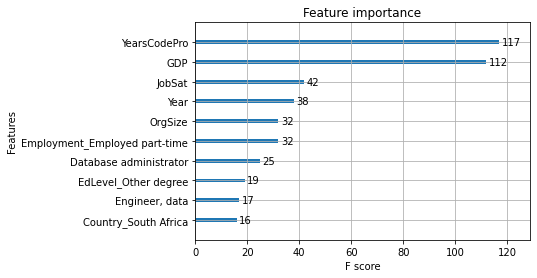

In [79]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10);